In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns

In [2]:
df= pd.read_csv('./jobs_in_data.csv')

In [3]:
df.dtypes

work_year              int64
job_title             object
job_category          object
salary_currency       object
salary                 int64
salary_in_usd          int64
employee_residence    object
experience_level      object
employment_type       object
work_setting          object
company_location      object
company_size          object
dtype: object

In [4]:
num_of_participants = df['company_location'].value_counts(ascending=False)

In [5]:
num_of_participants.head(10)

company_location
United States     8132
United Kingdom     449
Canada             226
Spain              113
Germany             72
France              50
Australia           24
Portugal            24
Netherlands         21
Brazil              17
Name: count, dtype: int64

In [6]:
acceptable_participants = pd.DataFrame(num_of_participants[:6])

In [7]:
acceptable_participants

,count
company_location,
United States,8132
United Kingdom,449
Canada,226
Spain,113
Germany,72
France,50


In [8]:
def reliable_loc_checker(country):
    return country in acceptable_participants.index

In [9]:
reliable_df = pd.DataFrame(df[df['company_location'].transform(reliable_loc_checker)])

In [10]:
reliable_df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [13]:
salary = pd.DataFrame(reliable_df['salary_in_usd'].groupby([reliable_df['company_location'], reliable_df['experience_level'], reliable_df['job_category']]).mean())

In [208]:
salary.to_csv('./salary.csv')

In [15]:
s = pd.read_csv('./salary.csv')

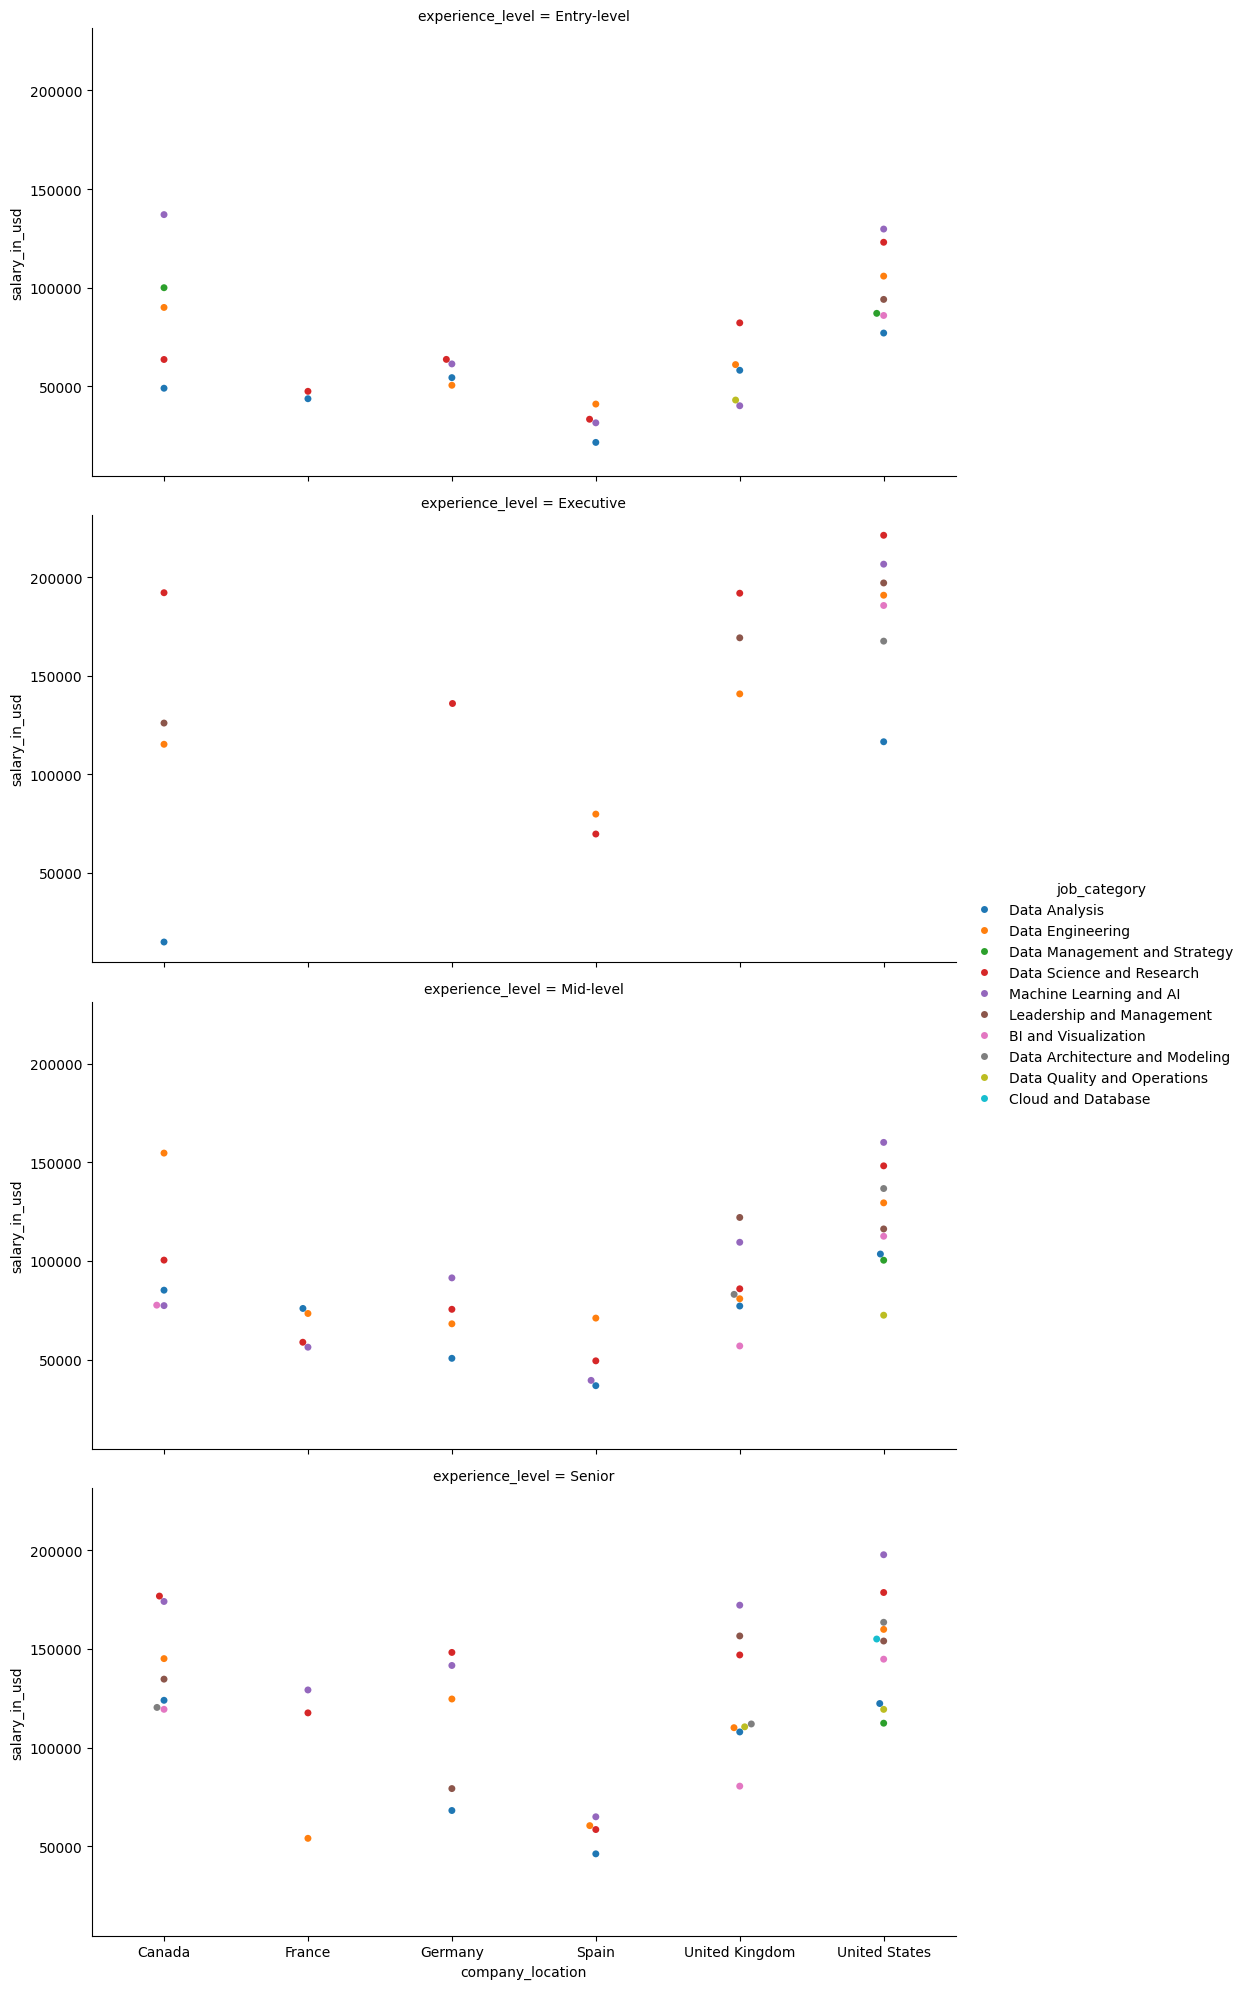

In [17]:
salary_figure = sns.catplot(
    data=s,
    x='company_location',
    y='salary_in_usd',
    hue='job_category',
    height=5,
    aspect=2,
    alpha= 1,
    row='experience_level',
    kind='swarm'
)

In [20]:
salary_figure.savefig('./salary_in_top_five_countries.svg', format='svg')